<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

The project consists of 3 parts:
* First part is related with 'data cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, Dropping useless columns.
* Second part is related with 'filling data'. It deals with Missing Values. Categorical to numeric transformation is done.
* Third part is related with 'handling outliers of data' via Visualisation libraries. Some insights are extracted.

`Importing Libraries Needed in This Notebook`

In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows=100
pd.options.display.max_columns=100

# PART- 1 `( Data Cleaning )`

In [2]:
df0 = pd.read_json ('scout_car.json', lines = True)
# if we do not use lines=True, we will get "ValueError: Trailing Data"
df = df0.copy()
df.head()

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[

In [3]:
df.shape

(15919, 54)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [4]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version',
       'Electricity consumption', 'Last Service Date', 'Other Fuel Types',
       'Availability', 'Last Timing Belt Service Date', 'Available from'],
      dtype='object')

## Fix incorrect Headers

### First method of cleaning headers 

pip install skimpy

In [6]:
from skimpy import clean_columns

In [7]:
df1=clean_columns(df)
df1.head(3)

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,k_w,hp,type,previous_owners,next_inspection,inspection_new,warranty,full_service,non_smoking_vehicle,null,make,model,offer_number,first_registration,body_color,paint_type,body_color_original,upholstery,body,nr_of_doors,nr_of_seats,model_code,gearing_type,displacement,cylinders,weight,drive_chain,fuel,consumption,co_2_emission,emission_class,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,electricity_consumption,last_service_date,other_fuel_types,availability,last_timing_belt_service_date,available_from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Second method of cleaning headers 

In [5]:
df.rename(columns={"\nComfort & Convenience\n":"Comfort & Convenience",
                  "\nEntertainment & Media\n":"Entertainment & Media",
                  "\nExtras\n":"Extras",
                  "\nSafety & Security\n":"Safety & Security"}, inplace=True)
# use 'inplace=True' to make these chances permanent 

In [9]:
df.head(1).T

,0
url,https://www.autoscout24.com//offers/audi-a1-sp...
make_model,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima
body_type,Sedans
price,15770
vat,VAT deductible
km,"56,013 km"
registration,01/2016
prev_owner,2 previous owners
kW,NaN


### Third method of cleaning headers 

df["Comfort & Convenience"]=df["\nComfort & Convenience\n"]
df["Entertainment & Media"]=df["\nEntertainment & Media\n"]
df["Extras"]=df["\nExtras\n"]
df["Safety & Security"]=df["\nSafety & Security\n"]

#then we need to delete old columns that we corrected 
drop_columns=["\nComfort & Convenience\n","\nEntertainment & Media\n","\nExtras\n","\nSafety & Security\n"]
df.drop(drop_columns, axis=1, inplace=True) 

# Finding NaN Values

In [10]:
df.isnull().sum()   #assuming that all NaN values are written correctly

url                                  0
make_model                           0
short_description                   46
body_type                           60
price                                0
vat                               4513
km                                   0
registration                         0
prev_owner                        6828
kW                               15919
hp                                   0
Type                                 2
Previous Owners                   6640
Next Inspection                  12384
Inspection new                   11987
Warranty                          5420
Full Service                      7704
Non-smoking Vehicle               8742
null                                 0
Make                                 0
Model                                0
Offer Number                      3175
First Registration                1597
Body Color                         597
Paint Type                        5772
Body Color Original      

In [16]:
  # df.isnull().sum()/len(df)*100 #percentage of missing values per columns
df.isnull().sum()/df.shape[0]*100

url                               0.000
make_model                        0.000
short_description                 0.289
body_type                         0.377
price                             0.000
vat                              28.350
km                                0.000
registration                      0.000
prev_owner                       42.892
kW                              100.000
hp                                0.000
Type                              0.013
Previous Owners                  41.711
Next Inspection                  77.794
Inspection new                   75.300
Warranty                         34.047
Full Service                     48.395
Non-smoking Vehicle              54.916
null                              0.000
Make                              0.000
Model                             0.000
Offer Number                     19.945
First Registration               10.032
Body Color                        3.750
Paint Type                       36.259


# Def Functions 

## 'take_2' : Take second item in the list 

In [6]:
def take_2(x):
    if type(x)==float: 
        return np.nan 
    else:
        return x[1]
    
# if Nan, return Nan, else take second item in the list     

## 'take_list' : Take specific item from the list 

In [256]:
# alternative def 
# take a.item from the list
def take_list(x,a):
    if type(x) == list:
        if len(x) > a: 
            x = x[a]
        else:
            x = np.nan
    else:
        x = np.nan
    return x

In [556]:
df['Non-smoking Vehicle'].apply(lambda x: take_list(x,3))

TypeError: 'DataFrame' object is not callable

# Examination Of Colomns

## url

In [13]:
df['url'].value_counts

<bound method IndexOpsMixin.value_counts of 0        https://www.autoscout24.com//offers/audi-a1-sp...
1        https://www.autoscout24.com//offers/audi-a1-1-...
2        https://www.autoscout24.com//offers/audi-a1-sp...
3        https://www.autoscout24.com//offers/audi-a1-1-...
4        https://www.autoscout24.com//offers/audi-a1-sp...
                               ...                        
15914    https://www.autoscout24.com//offers/renault-es...
15915    https://www.autoscout24.com//offers/renault-es...
15916    https://www.autoscout24.com//offers/renault-es...
15917    https://www.autoscout24.com//offers/renault-es...
15918    https://www.autoscout24.com//offers/renault-es...
Name: url, Length: 15919, dtype: object>

In [ ]:
#df.rename(columns={'url':'drop_url'},inplace=True)

## make_model vs Make vs Model 

In [14]:
df['make_model'].value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [16]:
df['Make'].value_counts()

\nOpel\n       7343
\nAudi\n       5712
\nRenault\n    2864
Name: Make, dtype: int64

In [18]:
df['Make'].isnull().sum() 

0

In [19]:
df['Model'].value_counts()

[\n, A3, \n]          3097
[\n, A1, \n]          2614
[\n, Insignia, \n]    2598
[\n, Astra, \n]       2526
[\n, Corsa, \n]       2219
[\n, Clio, \n]        1839
[\n, Espace, \n]       991
[\n, Duster, \n]        34
[\n, A2, \n]             1
Name: Model, dtype: int64

In [20]:
df['Model'].isnull().sum()
# df['Model'].isna().sum() 

0

In [21]:
df[["Make","Model",'make_model']].head(10)

,Make,Model,make_model
0,\nAudi\n,"[\n, A1, \n]",Audi A1
1,\nAudi\n,"[\n, A1, \n]",Audi A1
2,\nAudi\n,"[\n, A1, \n]",Audi A1
3,\nAudi\n,"[\n, A1, \n]",Audi A1
4,\nAudi\n,"[\n, A1, \n]",Audi A1
5,\nAudi\n,"[\n, A1, \n]",Audi A1
6,\nAudi\n,"[\n, A1, \n]",Audi A1
7,\nAudi\n,"[\n, A1, \n]",Audi A1
8,\nAudi\n,"[\n, A1, \n]",Audi A1
9,\nAudi\n,"[\n, A1, \n]",Audi A1


### Clean Column 'Make'

In [22]:
# Alternative 1
df0['Model'].apply(lambda x: x[1])

0            A1
1            A1
2            A1
3            A1
4            A1
          ...  
15914    Espace
15915    Espace
15916    Espace
15917    Espace
15918    Espace
Name: Model, Length: 15919, dtype: object

In [353]:
## Alternative 2
df["Model"].str[1].str.strip("\n")

0        1
1        1
2        1
3        1
4        1
        ..
15914    s
15915    s
15916    s
15917    s
15918    s
Name: Model, Length: 15919, dtype: object

In [7]:
## Alternative 3 - using remove function we created before
df['Model'] = df['Model'].apply(take_2)
df['Model']

0            A1
1            A1
2            A1
3            A1
4            A1
          ...  
15914    Espace
15915    Espace
15916    Espace
15917    Espace
15918    Espace
Name: Model, Length: 15919, dtype: object

In [24]:
df['Model'].value_counts()

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: Model, dtype: int64

### Clean Column 'Model '

In [8]:
df['Make'] = df['Make'].replace('\\n', '', regex=True)
df['Make'].value_counts()

Opel       7343
Audi       5712
Renault    2864
Name: Make, dtype: int64

## short_description vs description 

In [23]:
df['short_description'].value_counts()

SPB 1.6 TDI 116 CV S tronic Sport                 64
1.4 66kW (90CV) Selective                         40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH             38
SPB 30 TDI S tronic Business                      35
SPB 30 TFSI S tronic Admired                      35
                                                  ..
K Sports Tourer Business **Navi*Voll**             1
1.0 Turbo ecoFLEX Automatic Elective Park Navi     1
1.6 CDTI Business *Navi*Automatik*Spurh.*          1
1.6 136 CV Automatica Navi E 6 Garanzia Full       1
TCe 225 EDC GPF LIM Deluxe Pano,RFK                1
Name: short_description, Length: 10001, dtype: int64

In [24]:
df['short_description'].isnull().sum() 

46

In [26]:
df[["short_description","description"]].sample(15) 
#we are checking if is there any similarity 

,short_description,description
3831,1.0 TFSI Limousine S tronic design,[\nFarbe des Fahrzeugs: Gletscherweiß Metallic...
4634,Sportback 1.5 TFSI CoD EVO Design Editio,"[\n, https://autocasion.telenauto.com/, Posibi..."
8398,"1.4 Color Edition Autom. Pano/17""Alu/Sitzh","[\n, Innenausstattung:, Stoff, Schwarz, Ladera..."
11814,B ST Innovation 1.5 RückCam LED Navi,"[\nFahrzeug-Nr: 00-49-13586, , , Media, , F..."
9455,"""1 4 66kW (90CV) Selective""","[\n"". Resto de equipamiento, Rueda de repuesto..."
9695,E 120 Jahre 5T 1.4 Automatik,[\nVerfügbar ab: 24.08.2019 - Sie können sich ...
1668,Sportback 1.0 TFSI ultra 70 kW S-tronic,"[\nAudi Smartphone Interface,Ausstattungs-Pake..."
13724,dCi 8V 75 CV Start&Stop 5 Porte,"[\nRENAULT CLIO 1.5 dCi 75 CV Start&Stop, ————..."
2637,SPB 2.0 TDI 184 CV S tronic S-LINE-BOOK-,"[\nSPETTACOLARE AUDI A3 SPORT BACK, S-LINE INT..."
3914,1.6 TDI Sportback Business S Tronic,[\nRif. 5687763 - NO COMMERCIANTI - VEICOLO FA...


In [27]:
df['description'].isnull().sum() 

0

### Clean Column Description

In [28]:
df['description'][0]

['\n',
 'Sicherheit:',
 ' ',
 'Deaktivierung für Beifahrer-Airbag',
 ' ',
 'ESC mit elektronischer Quersperre',
 ' ',
 'Tagfahrlicht',
 ' ',
 'Reifendruck-Kontrollanzeige',
 ' ',
 'Kopfairbag-System mit Seiten-Airbags vorn',
 ' ',
 'Sicherheitslenksäule',
 'Assistenzsysteme:',
 ' ',
 'Berganfahrassistent',
 'Komfort:',
 ' ',
 'Scheinwerferreinigung',
 ' ',
 'Xenon plus inklusive Scheinwerfer-Reinigungsanlage',
 ' ',
 'Scheinwerfer-Reinigungsanlage',
 ' ',
 'Einparkhilfe hinten',
 ' ',
 'Licht-/Regensensor',
 ' ',
 'Funkfernbedienung',
 ' ',
 'Elektrische Luftzusatzheizung',
 'Interieur:',
 ' ',
 'Rücksitzanlage 2 + 1',
 ' ',
 'Multifunktions-Sportlederlenkrad im 3-Speichen-Design',
 ' ',
 'automatische Leuchtweitenregulierung',
 ' ',
 'Fahrerinformationssystem',
 ' ',
 'Staub- und Pollenfilter',
 ' ',
 'Kopfstützen hinten (3 Stück)',
 ' ',
 'Stoff Zeitgeist',
 ' ',
 'Fahrersitz manuell höheneinstellbar',
 ' ',
 'Scheiben seitlich und hinten in Wärmeschutzverglasung',
 ' ',
 'Kindersitz

In [ ]:
df['description']

## body_type vs Body

In [29]:
df['body_type'].value_counts()

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [30]:
df['body_type'].isnull().sum() 

60

In [31]:
df['Body'].value_counts()

[\n, Sedans, \n]           7903
[\n, Station wagon, \n]    3553
[\n, Compact, \n]          3153
[\n, Van, \n]               783
[\n, Other, \n]             290
[\n, Transporter, \n]        88
[\n, Off-Road, \n]           56
[\n, Coupe, \n]              25
[\n, Convertible, \n]         8
Name: Body, dtype: int64

In [32]:
df['Body'].isnull().sum() 

60

### Clean Column "Body"

In [33]:
df['Body'][1]

['\n', 'Sedans', '\n']

In [34]:
type(np.NaN)

float

In [36]:
#alternative 1
df0['Body'].apply(lambda x: np.nan if type(x)==float else x[1])

0        Sedans
1        Sedans
2        Sedans
3        Sedans
4        Sedans
          ...  
15914       Van
15915       Van
15916       Van
15917       Van
15918       Van
Name: Body, Length: 15919, dtype: object

In [9]:
#alternative 2
df['Body']=df['Body'].apply(take_2)
df['Body']

0        Sedans
1        Sedans
2        Sedans
3        Sedans
4        Sedans
          ...  
15914       Van
15915       Van
15916       Van
15917       Van
15918       Van
Name: Body, Length: 15919, dtype: object

In [38]:
df['Body'].value_counts()

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: Body, dtype: int64

## price

In [39]:
df['price'].value_counts()

14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: price, Length: 2956, dtype: int64

In [40]:
df['price'].isnull().sum() 

0

## vat

In [41]:
df['vat'].value_counts()

VAT deductible      10980
Price negotiable      426
Name: vat, dtype: int64

In [42]:
df['vat'].isnull().sum() 

4513

In [43]:
df['vat'].sample(20)

12877    VAT deductible
10550    VAT deductible
13146    VAT deductible
15108              None
4940     VAT deductible
8186     VAT deductible
10834              None
15454    VAT deductible
1496     VAT deductible
7907               None
15079              None
578                None
7022               None
5279     VAT deductible
9571               None
15589    VAT deductible
7299               None
7102     VAT deductible
6694     VAT deductible
2276     VAT deductible
Name: vat, dtype: object

In [44]:
df.iloc[3696] # just checking vat=Nan values on a random row

url                              https://www.autoscout24.com//offers/audi-a3-a3...
make_model                                                                 Audi A3
short_description                             A3 SPB 1.6 TDI 116 CV S tronic Sport
body_type                                                                   Sedans
price                                                                        21900
vat                                                                           None
km                                                                       25,656 km
registration                                                               03/2018
prev_owner                                                                    None
kW                                                                             NaN
hp                                                                           85 kW
Type                                       [, Used, , Diesel (Particulate Filter)]
Prev

In [85]:
# 1.veya 2.el ?
# otomobil markasi 
# co2 emission ? 

## KM

In [45]:
df['km'].value_counts()

10 km        1045
- km         1024
1 km          367
5 km          170
50 km         148
             ... 
67,469 km       1
43,197 km       1
10,027 km       1
35,882 km       1
57 km           1
Name: km, Length: 6690, dtype: int64

In [75]:
df['km'].isnull().sum()

0

 ###  Clean Column "km"

In [10]:
df['km'] = df['km'].replace({'[ km]': '', '-': 0 , ',': ''}, regex=True).astype(float).astype('Int64')
df['km']

0        56013
1        80000
2        83450
3        73000
4        16200
         ...  
15914        0
15915     9900
15916       15
15917       10
15918        0
Name: km, Length: 15919, dtype: Int64

## registration and first registration

In [50]:
df[["registration", "First Registration"]]

,registration,First Registration
0,01/2016,"[\n, 2016, \n]"
1,03/2017,"[\n, 2017, \n]"
2,02/2016,"[\n, 2016, \n]"
3,08/2016,"[\n, 2016, \n]"
4,05/2016,"[\n, 2016, \n]"
...,...,...
15914,-/-,NaN
15915,01/2019,"[\n, 2019, \n]"
15916,03/2019,"[\n, 2019, \n]"
15917,06/2019,"[\n, 2019, \n]"


In [51]:
df[['registration', "First Registration"]].isnull().sum()

registration             0
First Registration    1597
dtype: int64

### Clean Column "registration"

- we need to remove '-/-' values on the column

In [11]:
df['registration']=df['registration'].replace('-/-',np.nan,regex=True)
df['registration']

0        01/2016
1        03/2017
2        02/2016
3        08/2016
4        05/2016
          ...   
15914        NaN
15915    01/2019
15916    03/2019
15917    06/2019
15918    01/2019
Name: registration, Length: 15919, dtype: object

In [53]:
df['registration'].isnull().sum() 

1597

#### Object to datetime 'registration' 

In [12]:
from datetime import date
from datetime import datetime
from datetime import timedelta

In [13]:
df['registration']=pd.to_datetime(df['registration'])
df['registration']

0       2016-01-01
1       2017-03-01
2       2016-02-01
3       2016-08-01
4       2016-05-01
           ...    
15914          NaT
15915   2019-01-01
15916   2019-03-01
15917   2019-06-01
15918   2019-01-01
Name: registration, Length: 15919, dtype: datetime64[ns]

### Clean Column "First Registration"

In [354]:
df['First Registration'] = df["First Registration"].str[1].str.strip("\n")
df['First Registration']

0        2016
1        2017
2        2016
3        2016
4        2016
         ... 
15914     NaN
15915    2019
15916    2019
15917    2019
15918    2019
Name: First Registration, Length: 15919, dtype: object

In [14]:
# Alternative 
df['First Registration'].apply(take_2)

0        2016
1        2017
2        2016
3        2016
4        2016
         ... 
15914     NaN
15915    2019
15916    2019
15917    2019
15918    2019
Name: First Registration, Length: 15919, dtype: object

In [15]:
#Changing object to int
df['First Registration'] = df['First Registration'].astype(float).astype('Int64')
df['First Registration']

0        2016
1        2017
2        2016
3        2016
4        2016
         ... 
15914    <NA>
15915    2019
15916    2019
15917    2019
15918    2019
Name: First Registration, Length: 15919, dtype: Int64

## prev_owner vs previous owners

In [58]:
df['prev_owner'].value_counts()

1 previous owner     8294
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

In [59]:
df['prev_owner'].isnull().sum() 

6828

In [60]:
df[["prev_owner","Previous Owners"]].head(10)

,prev_owner,Previous Owners
0,2 previous owners,\n2\n
1,None,NaN
2,1 previous owner,\n1\n
3,1 previous owner,\n1\n
4,1 previous owner,\n1\n
5,1 previous owner,\n1\n
6,1 previous owner,\n1\n
7,1 previous owner,\n1\n
8,1 previous owner,\n1\n
9,None,NaN


In [61]:
df['Previous Owners'].isnull().sum() 

6640

### Clean Column 'prev_owner'

In [57]:
df['prev_owner']=df['prev_owner'].str.split(" ").str[0]
df['prev_owner']

0           2
1        None
2           1
3           1
4           1
         ... 
15914    None
15915       1
15916       1
15917    None
15918       1
Name: prev_owner, Length: 15919, dtype: object

In [58]:
df['prev_owner'].value_counts()

1    8294
2     778
3      17
4       2
Name: prev_owner, dtype: int64

### Clean Column 'Previous Owners'

In [63]:
df["Previous Owners"]

0                                                    \n2\n
1                                                      NaN
2                                                    \n1\n
3                                                    \n1\n
4                                                    \n1\n
                               ...                        
15914                                                  NaN
15915    [\n1\n, \n, 7.4 l/100 km (comb), \n, 9.2 l/100...
15916                     [\n1\n, \n139 g CO2/km (comb)\n]
15917                                                  NaN
15918                                                \n1\n
Name: Previous Owners, Length: 15919, dtype: object

In [17]:
df["Previous Owners"] = df["Previous Owners"].apply(
    lambda x: x[0] if type(x) == list else x).replace('\\n', '', regex=True)
df["Previous Owners"]

0          2
1        NaN
2          1
3          1
4          1
        ... 
15914    NaN
15915      1
15916      1
15917    NaN
15918      1
Name: Previous Owners, Length: 15919, dtype: object

In [65]:
df["Previous Owners"].value_counts()

1    8294
2     778
0     188
3      17
4       2
Name: Previous Owners, dtype: int64

In [66]:
df[["prev_owner","Previous Owners"]].head(10)

,prev_owner,Previous Owners
0,2,2
1,NaN,NaN
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,NaN,NaN


## kW

In [67]:
df['kW']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
15914   NaN
15915   NaN
15916   NaN
15917   NaN
15918   NaN
Name: kW, Length: 15919, dtype: float64

In [68]:
df['kW'].isnull().sum() 

15919

## hp

In [69]:
df['hp'].value_counts()

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
70 kW      888
125 kW     707
51 kW      695
55 kW      569
118 kW     516
92 kW      466
121 kW     392
147 kW     380
77 kW      345
56 kW      286
54 kW      276
103 kW     253
87 kW      232
165 kW     194
88 kW      177
60 kW      160
162 kW      98
- kW        88
74 kW       81
96 kW       72
71 kW       59
101 kW      47
67 kW       40
154 kW      39
122 kW      35
119 kW      30
164 kW      27
135 kW      24
82 kW       22
52 kW       22
78 kW       20
1 kW        20
294 kW      18
146 kW      18
141 kW      16
57 kW       10
104 kW       8
120 kW       8
191 kW       7
112 kW       7
155 kW       6
117 kW       6
184 kW       5
90 kW        4
76 kW        4
65 kW        4
149 kW       3
80 kW        3
168 kW       3
98 kW        3
93 kW        3
228 kW       2
270 kW       2
53 kW        2
140 kW       2
86 kW        2
167 kW       2
127 kW       2
89 kW        2
143 kW       2
63 kW        2
40 kW     

In [70]:
df['hp'].isnull().sum() 

0

In [71]:
type(df0['hp'][1])

str

### Clean Column 'hp'


In [18]:
df['hp']=df['hp'].replace({'[ kW]': '', '-': np.nan}, regex=True).astype('float').astype('Int64')
df['hp']

0         66
1        141
2         85
3         66
4         66
        ... 
15914    147
15915    165
15916    146
15917    147
15918    165
Name: hp, Length: 15919, dtype: Int64

##  Type

In [46]:
df['Type']

0                  [, Used, , Diesel (Particulate Filter)]
1                                     [, Used, , Gasoline]
2                  [, Used, , Diesel (Particulate Filter)]
3                  [, Used, , Diesel (Particulate Filter)]
4                  [, Used, , Diesel (Particulate Filter)]
                               ...                        
15914               [, New, , Diesel (Particulate Filter)]
15915    [, Used, , Super 95 / Super Plus 98 (Particula...
15916                         [, Pre-registered, , Diesel]
15917                         [, Pre-registered, , Diesel]
15918                        [, Demonstration, , Super 95]
Name: Type, Length: 15919, dtype: object

In [74]:
df['Type'][1555]

['', 'Used', '', 'Diesel (Particulate Filter)']

In [75]:
type(df['Type'][1555])

list

In [76]:
df['Type'].isnull().sum() 

2

### Cleaning Column 'Type'

In [374]:
df['Type_used'] = df0['Type'].str[1].str.strip("\n")
df['Type_used']

0                  Used
1                  Used
2                  Used
3                  Used
4                  Used
              ...      
15914               New
15915              Used
15916    Pre-registered
15917    Pre-registered
15918     Demonstration
Name: Type_used, Length: 15919, dtype: object

In [375]:
df['Type_used'].value_counts()

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
Name: Type_used, dtype: int64

In [47]:
## Alternative 
df['Type'].apply(take_2)

0                  Used
1                  Used
2                  Used
3                  Used
4                  Used
              ...      
15914               New
15915              Used
15916    Pre-registered
15917    Pre-registered
15918     Demonstration
Name: Type_used, Length: 15919, dtype: object

### Cleaning Remaining 'Type'

In [444]:
df['Type_fuel']=df0['Type'].str[3].str.strip("\n")
df['Type_fuel']

0                          Diesel (Particulate Filter)
1                                             Gasoline
2                          Diesel (Particulate Filter)
3                          Diesel (Particulate Filter)
4                          Diesel (Particulate Filter)
                             ...                      
15914                      Diesel (Particulate Filter)
15915    Super 95 / Super Plus 98 (Particulate Filter)
15916                                           Diesel
15917                                           Diesel
15918                                         Super 95
Name: Type_fuel, Length: 15919, dtype: object

In [402]:
df['Type_fuel'].sample(10)

4231       Diesel (Particulate Filter)
7216       Diesel (Particulate Filter)
14421                         Super 95
6133     Super 95 / Regular/Benzine 91
5853                            Diesel
11639                           Diesel
9845           Super 95 / Super E10 95
1340                          Super 95
11065                           Diesel
15793      Diesel (Particulate Filter)
Name: Type_fuel, dtype: object

In [446]:
df['Type_fuel'] = df['Type_fuel'].str.split("/").str[0].str.strip().str.split("(").str[0].str.strip()
df['Type_fuel']

0          Diesel
1        Gasoline
2          Diesel
3          Diesel
4          Diesel
           ...   
15914      Diesel
15915    Super 95
15916      Diesel
15917      Diesel
15918    Super 95
Name: Type_fuel, Length: 15919, dtype: object

In [447]:
df['Type_fuel'].value_counts()

Diesel                  7297
Super 95                4368
Gasoline                3252
Regular                  503
Super E10 95             409
CNG                       36
LPG                       16
Super Plus 98             11
Liquid petroleum gas      10
Others                     6
Electric                   5
Super Plus E10 98          2
Biogas                     1
Domestic gas H             1
Name: Type_fuel, dtype: int64

In [439]:
benzine = ["Gasoline", "Super 95", "Regular", "Super E10 95", "Super Plus 98", "Super Plus E10 98", "Others"]
lpg = ["LPG", "Liquid petroleum gas", "CNG", "Biogas", "Domestic gas H"]

In [440]:
def fueltype(x):
    if x in benzine:
        return "Benzine"
    elif x in lpg:
        return "LPG/CNG"
    else:
        return x

In [448]:
df['Type_fuel']=df['Type_fuel'].apply(fueltype)
df['Type_fuel']

0         Diesel
1        Benzine
2         Diesel
3         Diesel
4         Diesel
          ...   
15914     Diesel
15915    Benzine
15916     Diesel
15917     Diesel
15918    Benzine
Name: Type_fuel, Length: 15919, dtype: object

In [449]:
df['Type_fuel'].value_counts()

Benzine     8551
Diesel      7297
LPG/CNG       64
Electric       5
Name: Type_fuel, dtype: int64

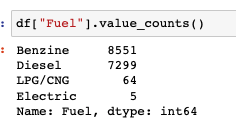

## Next Inspection vs Inspection new

In [81]:
df[["Next Inspection","Inspection new"]].sample(15)

,Next Inspection,Inspection new
7736,NaN,"[\nYes\n, \n0 kWh/100 km (comb)\n]"
13330,NaN,NaN
12143,NaN,"[\nYes\n, \n4 (Green)\n]"
15362,NaN,NaN
446,NaN,NaN
6313,NaN,"[\nYes\n, \n98 g CO2/km (comb)\n]"
13254,NaN,NaN
10362,"[\n01/2019\n, \n132 g CO2/km (comb)\n]",NaN
13502,NaN,\nYes\n
2113,NaN,NaN


In [82]:
df['Next Inspection'][8859]

['\n05/2021\n',
 '\n',
 '5.4 l/100 km (comb)',
 '\n',
 '6.7 l/100 km (city)',
 '\n',
 '4.6 l/100 km (country)',
 '\n']

In [83]:
df[["Next Inspection","Inspection new"]].isnull().sum() 

Next Inspection    12384
Inspection new     11987
dtype: int64

### Clean Column 'Next Inspection' ==> Creating New Column? 

In [20]:
df['Next Inspection Date'] = df['Next Inspection'].apply(
    lambda x: np.nan if type(x) == float else x[0]).replace("\\n","",regex=True)
df['Next Inspection Date']

0        06/2021
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
15914        NaN
15915    01/2022
15916        NaN
15917        NaN
15918        NaN
Name: Next Inspection Date, Length: 15919, dtype: object

### df['Next Inspection Date']

In [21]:
df['Next Inspection Date']=pd.to_datetime(df['Next Inspection Date'])
df['Next Inspection Date']

0       2021-06-01
1              NaT
2              NaT
3              NaT
4              NaT
           ...    
15914          NaT
15915   2022-01-01
15916          NaT
15917          NaT
15918          NaT
Name: Next Inspection Date, Length: 15919, dtype: datetime64[ns]

## Clean Column "Inspection new" ==> Creating New Column "Inspection new(yes/no)"

In [86]:
df["Inspection new"][8859]

['\nYes\n', '\n128 g CO2/km (comb)\n']

In [87]:
df.iloc[8859]

url                              https://www.autoscout24.com//offers/opel-corsa...
make_model                                                              Opel Corsa
short_description                            E Selection wenig Km,Wekstattgepflegt
body_type                                                                  Compact
price                                                                         7650
vat                                                                           None
km                                                                           15900
registration                                                   2016-04-01 00:00:00
prev_owner                                                                     NaN
kW                                                                             NaN
hp                                                                              51
Type                                                                          Used
Prev

In [22]:
df["Inspection new(yes/no)"] = df["Inspection new"].apply(
    lambda x: np.nan if type(x) == float else x[0]).replace("\\\n","",regex=True)
df["Inspection new(yes/no)"]

0        Yes
1        NaN
2        NaN
3        NaN
4        Yes
        ... 
15914    NaN
15915    NaN
15916    Yes
15917    NaN
15918    Yes
Name: Inspection new(yes/no), Length: 15919, dtype: object

## CO2 Emission vs Emission Class vs Emission Label

In [89]:
df['CO2 Emission'][2124]

['\n110 g CO2/km (comb)\n']

### Clean Column 'CO2 Emission'

In [92]:
df['CO2 Emission'].apply(lambda x: np.nan
                         if type(x) == float else x[0]).replace(
                             "\\n", "", regex=True).value_counts()

120 g CO2/km (comb)      740
[]                       628
99 g CO2/km (comb)       545
97 g CO2/km (comb)       537
104 g CO2/km (comb)      501
                        ... 
14 g CO2/km (comb)         1
1,060 g CO2/km (comb)      1
51 g CO2/km (comb)         1
165 g CO2/km (comb)        1
193 g CO2/km (comb)        1
Name: CO2 Emission, Length: 123, dtype: int64

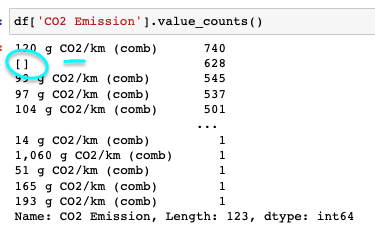

### Def Function  'take_1 : take first item in the list 

In [356]:
# aLternative 
df["CO2 Emission"] = df["CO2 Emission"].str[0].str.strip("\n")
df["CO2 Emission"]

0         99 g CO2/km (comb)
1        129 g CO2/km (comb)
2         99 g CO2/km (comb)
3         99 g CO2/km (comb)
4        109 g CO2/km (comb)
                ...         
15914    139 g CO2/km (comb)
15915    168 g CO2/km (comb)
15916    139 g CO2/km (comb)
15917    139 g CO2/km (comb)
15918    153 g CO2/km (comb)
Name: CO2 Emission, Length: 15919, dtype: object

In [25]:
## if we only want numbers
df['CO2 Emission']=df['CO2 Emission'].str.split(" ").str[0]
df['CO2 Emission']

0         99
1        129
2         99
3         99
4        109
        ... 
15914    139
15915    168
15916    139
15917    139
15918    153
Name: CO2 Emission, Length: 15919, dtype: object

In [146]:
## Alternative 
def take_1(x):
    if type(x)==float: 
        return np.nan 
    elif type(x[0])==list:
        return np.nan
    else:
        return x[0]
## if first item is nested list, we won't take it 

In [357]:
df['CO2 Emission'].apply(take_1).replace("\\n", "", regex=True).str.split(" ").str[0]

0         99
1        129
2         99
3         99
4        109
        ... 
15914    139
15915    168
15916    139
15917    139
15918    153
Name: CO2 Emission, Length: 15919, dtype: object

### Clean Column 'Emission Class'

In [100]:
type(df['Emission Class'][7847][1])

list

In [101]:
 df['Emission Class'][4794]

['\nEuro 6d-TEMP\n']

In [26]:
# use take_1 def function to get first item in the list 
df['Emission Class'] = df['Emission Class'].apply(take_1).replace("\\n", "", regex=True)
df['Emission Class']

0              Euro 6
1              Euro 6
2              Euro 6
3              Euro 6
4              Euro 6
             ...     
15914             NaN
15915             NaN
15916    Euro 6d-TEMP
15917          Euro 6
15918          Euro 6
Name: Emission Class, Length: 15919, dtype: object

In [ ]:
# ALternative 
df["Emission Class"].str[0].str.strip("\n")

In [103]:
df['Emission Class'].value_counts()

Euro 6          10139
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: Emission Class, dtype: int64

In [612]:
df[["Emission Label",'registration', 'CO2 Emission', 'Emission Class']].sample(10)

,Emission Label,registration,CO2 Emission,Emission Class
15876,NaN,2019-09-01,NaN,NaN
10216,NaN,2019-04-01,126 g CO2/km (comb),Euro 6d-TEMP
4160,NaN,2017-04-01,104 g CO2/km (comb),Euro 6
7956,NaN,2019-05-01,NaN,NaN
14976,NaN,2016-03-01,120 g CO2/km (comb),Euro 6
4365,NaN,2017-03-01,99 g CO2/km (comb),Euro 6
2896,NaN,2016-06-01,NaN,NaN
13748,NaN,2016-01-01,85 g CO2/km (comb),Euro 6
11583,[\n4 (Green)\n],2017-07-01,139 g CO2/km (comb),Euro 6
4516,[\n4 (Green)\n],NaT,125 g CO2/km (comb),Euro 6d-TEMP


In [227]:
df[["Next Inspection","Inspection new", 'CO2 Emission', 'Emission Class', "Emission Label"]].isnull().sum() 

Next Inspection    12384
Inspection new     11987
CO2 Emission        1808
Emission Class      3021
Emission Label     11934
dtype: int64

In [34]:
df["Emission Label"].value_counts()

[\n4 (Green)\n]         3553
[\n1 (No sticker)\n]     381
[[], [], []]              40
[\n5 (Blue)\n]             8
[\n3 (Yellow)\n]           2
[\n2 (Red)\n]              1
Name: Emission Label, dtype: int64

### Clean Column 'Emission Label'

In [40]:
df["Emission Label"]

0                    NaN
1        [\n4 (Green)\n]
2        [\n4 (Green)\n]
3                    NaN
4                    NaN
              ...       
15914                NaN
15915                NaN
15916                NaN
15917                NaN
15918    [\n4 (Green)\n]
Name: Emission Label, Length: 15919, dtype: object

In [41]:
df["Emission_Label_new"] = df["Emission Label"].str[0].str.split().str[1].str.strip("()")
df["Emission_Label_new"]

0          NaN
1        Green
2        Green
3          NaN
4          NaN
         ...  
15914      NaN
15915      NaN
15916      NaN
15917      NaN
15918    Green
Name: Emission_Label_new, Length: 15919, dtype: object

In [42]:
df["Emission_Label_new"].value_counts()

Green     3553
No         381
Blue         8
Yellow       2
Red          1
Name: Emission_Label_new, dtype: int64

## Warranty

In [105]:
df['Warranty'][12104]

['\n60 months\n', '\n139 g CO2/km (comb)\n']

In [28]:
df['Consumption'][12104]

['\n',
 '6.1 l/100 km (comb)',
 '\n',
 '7.6 l/100 km (city)',
 '\n',
 '5.2 l/100 km (country)',
 '\n']

In [27]:
df.iloc[12104]

url                              https://www.autoscout24.com//offers/opel-insig...
make_model                                                           Opel Insignia
short_description                          1.5 T Innovation Matrix-LED,Navi,Kamera
body_type                                                            Station wagon
price                                                                        21540
vat                                                                 VAT deductible
km                                                                           29100
registration                                                   2018-01-01 00:00:00
prev_owner                                                                     NaN
kW                                                                             NaN
hp                                                                             121
Type                                                                          Used
Prev

In [106]:
df['Warranty'][0]

['\n', '\n', '\n4 (Green)\n']

In [60]:
df['Warranty'].sample(20)

2011                                \n36 months\n
4938               [\n36 months\n, \n4 (Green)\n]
5866                                          NaN
3241                         [\n, \n, \nEuro 6\n]
15433                                         NaN
6580                        [\n, \n, \nEuro 6c\n]
7182            [\n, \n, \n128 g CO2/km (comb)\n]
15028                 [\n24 months\n, \nEuro 6\n]
11587                  [\n, \n, \nEuro 6d-TEMP\n]
2791                                     [\n, \n]
1296                                \n12 months\n
9164                                          NaN
14891                        [\n, \n, \nEuro 6\n]
7746                                          NaN
12136                 [\n12 months\n, \nEuro 6\n]
5332            [\n, \n, \n114 g CO2/km (comb)\n]
9629                                          NaN
15605                               \n12 months\n
6635     [\n12 months\n, \n114 g CO2/km (comb)\n]
14040                                         NaN


In [125]:
df['Warranty'].isnull().sum() 

5420

### Clean Column 'Warranty'

In [ ]:
def take_1(x):
    if type(x)==float: 
        return np.nan 
    elif type(x[0])==list:
        return np.nan
    else:

In [29]:
df['Warranty_month'] = df['Warranty'].apply(take_1).replace(
    "\\n", "", regex=True).str.split(" ").str[0]
df['Warranty_month']

0           
1        NaN
2           
3        NaN
4           
        ... 
15914       
15915       
15916       
15917       
15918    NaN
Name: Warranty_month, Length: 15919, dtype: object

In [31]:
df['Warranty_month'].value_counts()

      7703
12    1417
24     552
60     382
36     223
6       49
72      44
48      40
3       14
23      10
18       7
20       7
25       5
50       4
16       4
2        4
34       3
1        2
11       2
14       2
45       2
22       2
21       2
17       2
46       2
26       2
13       2
65       1
33       1
28       1
15       1
7        1
19       1
10       1
56       1
49       1
47       1
40       1
Name: Warranty_month, dtype: int64

In [113]:
df['Warranty'].isnull().sum()

5420

## Full Service

In [32]:
df['Full Service'][6559]

['\n', '\n', '\n128 g CO2/km (comb)\n']

In [34]:
df.iloc[6559]

url                              https://www.autoscout24.com//offers/opel-astra...
make_model                                                              Opel Astra
short_description                                K 1.4 Selection*Alu*FSA*Klima*ZV*
body_type                                                                   Sedans
price                                                                        10990
vat                                                                           None
km                                                                            3898
registration                                                   2017-05-01 00:00:00
prev_owner                                                                     NaN
kW                                                                             NaN
hp                                                                              74
Type                                                                          Used
Prev

In [44]:
df[["Full Service","Warranty", "CO2 Emission", "Emission Class","Emission Label"]].sample(20)

,Full Service,Warranty,CO2 Emission,Emission Class,Emission Label
5818,"[\n, \n, \nEuro 6\n]","[\n, \n, \n12,087 g CO2/km (comb)\n]","12,087",Euro 6,NaN
14489,NaN,NaN,NaN,NaN,[\n4 (Green)\n]
11798,NaN,"[\n, \n, \nEuro 6\n]",150,Euro 6,[\n4 (Green)\n]
10239,NaN,NaN,126,Euro 6,[\n4 (Green)\n]
7690,NaN,NaN,129,Euro 6d-TEMP,[\n4 (Green)\n]
13526,NaN,\n12 months\n,NaN,Euro 6,NaN
3279,"[\n, \n, \n119 g CO2/km (comb)\n]",\n12 months\n,119,Euro 6,NaN
13540,NaN,NaN,85,Euro 5,NaN
8846,"[\n, \n]","[\n, \n]",NaN,NaN,[\n4 (Green)\n]
4869,NaN,"[\n24 months\n, \n107 g CO2/km (comb)\n]",107,Euro 6,NaN


### Clean "Full Service"

PS: received data might be "Emission Class", " Emission Label", or "CO2 Emission"

In [ ]:
# alternative def 
def take_list(x,a):
    if type(x) == list:
        if len(x) > a:
            x = x[a]
        else:
            x = np.nan
    else:
        x = np.nan
    return x

In [263]:
df['Full Service_new'] = df['Full Service'].apply(lambda x: take_list(x,2)).replace("\\n", "", regex=True)
df['Full Service_new']

0                       NaN
1                       NaN
2                       NaN
3        99 g CO2/km (comb)
4                 4 (Green)
                ...        
15914                   NaN
15915                   NaN
15916                   NaN
15917                   NaN
15918                   NaN
Name: Full Service_new, Length: 15919, dtype: object

## Non-smoking Vehicle 

In [37]:
df['Non-smoking Vehicle'].value_counts()

[\n, \n]                                                                                      3647
[\n, \n, \n4 (Green)\n]                                                                       1240
[\n, \n, \nEuro 6\n]                                                                          1127
[\n, \n, \nEuro 6d-TEMP\n]                                                                     345
\n                                                                                              70
[\n, \n, \n120 g CO2/km (comb)\n]                                                               63
[\n, \n, \n85 g CO2/km (comb)\n]                                                                46
[\n, \n, \n104 g CO2/km (comb)\n]                                                               36
[\n, \n, \n107 g CO2/km (comb)\n]                                                               36
[\n, \n, \n153 g CO2/km (comb)\n]                                                               31
[\n, \n, \

In [146]:
df['Non-smoking Vehicle'].isnull().sum() 

8742

In [184]:
df['Non-smoking Vehicle']

0                       [\n, \n]
1                            NaN
2                            NaN
3           [\n, \n, \nEuro 6\n]
4                       [\n, \n]
                  ...           
15914                        NaN
15915    [\n, \n, \n4 (Green)\n]
15916                   [\n, \n]
15917                        NaN
15918                        NaN
Name: Non-smoking Vehicle, Length: 15919, dtype: object

### Clean Column "Non-smoking Vehicle"

In [246]:
def non_smoking_2(x):
    if type(x)==float:  # nan value varsa 
        return np.nan
    elif len(x)<3: #  liste icinde 3ten az item varsa
        return np.nan
    else:
        return x[2] # hepsi tutuyorsa bana 3.item getir 

In [247]:
df['Non-smoking Vehicle'].apply(non_smoking_2)

0                  NaN
1                  NaN
2                  NaN
3           \nEuro 6\n
4                  NaN
             ...      
15914              NaN
15915    \n4 (Green)\n
15916              NaN
15917              NaN
15918              NaN
Name: Non-smoking Vehicle, Length: 15919, dtype: object

In [249]:
# alternative def 
def take_list(x,a):
    if type(x) == list:
        if len(x) > a:
            x = x[a]
        else:
            x = np.nan
    else:
        x = np.nan
    return x

In [277]:
df['consumption_Non-smoking Vehicle']=df['Non-smoking Vehicle'].apply(lambda x: take_list(x,2))
df['consumption_Non-smoking Vehicle']

0                  NaN
1                  NaN
2                  NaN
3           \nEuro 6\n
4                  NaN
             ...      
15914              NaN
15915    \n4 (Green)\n
15916              NaN
15917              NaN
15918              NaN
Name: consumption_Non-smoking Vehicle, Length: 15919, dtype: object

In [281]:
df['consumption_Non-smoking Vehicle'] = df['consumption_Non-smoking Vehicle'].replace("\\n", "", regex=True)
df['consumption_Non-smoking Vehicle'].value_counts()

4 (Green)              1240
Euro 6                 1127
Euro 6d-TEMP            345
120 g CO2/km (comb)      63
85 g CO2/km (comb)       46
104 g CO2/km (comb)      36
107 g CO2/km (comb)      36
153 g CO2/km (comb)      31
124 g CO2/km (comb)      29
1 (No sticker)           24
99 g CO2/km (comb)       23
106 g CO2/km (comb)      20
97 g CO2/km (comb)       20
108 g CO2/km (comb)      19
109 g CO2/km (comb)      18
105 g CO2/km (comb)      18
100 g CO2/km (comb)      18
113 g CO2/km (comb)      18
Euro 6c                  17
                         16
98 g CO2/km (comb)       15
129 g CO2/km (comb)      14
131 g CO2/km (comb)      13
103 g CO2/km (comb)      12
114 g CO2/km (comb)      12
133 g CO2/km (comb)      12
135 g CO2/km (comb)      11
102 g CO2/km (comb)      11
116 g CO2/km (comb)      11
127 g CO2/km (comb)      10
143 g CO2/km (comb)      10
Euro 6d                   9
92 g CO2/km (comb)        9
112 g CO2/km (comb)       9
118 g CO2/km (comb)       8
5 (Blue)            

In [270]:
# alternative 
df["Non-smoking Vehicle"].str[2].str.strip("\n")

0              NaN
1              NaN
2              NaN
3           Euro 6
4              NaN
           ...    
15914          NaN
15915    4 (Green)
15916          NaN
15917          NaN
15918          NaN
Name: Non-smoking Vehicle, Length: 15919, dtype: object

## Offer Number

In [264]:
df["Offer Number"].value_counts()

[\nLT67679\n]                                     27
[\nAK13780\n]                                     27
[\nTP62881\n]                                     27
[\nTA76392\n]                                     27
[\nXT61649\n]                                     27
                                                  ..
[\n160_dcbb6c3e-a6da-43a3-8754-ccd994cec93b\n]     1
[\n6701576\n]                                      1
[\n6701569\n]                                      1
[\n158121\n]                                       1
[\nRe_30000008029\n]                               1
Name: Offer Number, Length: 11440, dtype: int64

In [163]:
df["Offer Number"].isnull().sum() 

3175

### Clean Column Offer Number 

In [268]:
df["Offer Number"]=df["Offer Number"].apply(lambda x: np.nan if type(x)==float else x[0]).replace("\\n","",regex=True)
df["Offer Number"]

0             LR-062483
1                   NaN
2              AM-95365
3                   NaN
4                 C1626
              ...      
15914          10988301
15915       507370_3223
15916          Espace16
15917           2691331
15918    Re_30000008029
Name: Offer Number, Length: 15919, dtype: object

In [ ]:
## alternative 
df["Offer Number"].str[0].str.strip("\n")

## Body Color vs Paint Type

In [170]:
df["Body Color"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Black, \n]     3745
[\n, Grey, \n]      3505
[\n, White, \n]     3406
[\n, Silver, \n]    1647
[\n, Blue, \n]      1431
[\n, Red, \n]        957
[\n, Brown, \n]      289
[\n, Green, \n]      154
[\n, Beige, \n]      108
[\n, Yellow, \n]      51
[\n, Violet, \n]      18
[\n, Bronze, \n]       6
[\n, Orange, \n]       3
[\n, Gold, \n]         2
Name: Body Color, dtype: int64

In [353]:
df["Body Color Original"].value_counts()

[\nOnyx Schwarz\n]                     338
[\nBianco\n]                           282
[\nMythosschwarz Metallic\n]           238
[\nBrillantschwarz\n]                  216
[\nGris\n]                             204
                                      ... 
[\nRouge-Braun (G0Y)\n]                  1
[\nVARI COLRI DISPONIBILI\n]             1
[\nKokosnussbraun Metallic\n]            1
[\nFarbe frei wählbar\n]                 1
[\nPerlmutt-Weiß Metallic (Weiß)\n]      1
Name: Body Color Original, Length: 1927, dtype: int64

In [354]:
df["Paint Type"].value_counts()

[\nMetallic\n]       9794
[\nUni/basic\n]       347
[\nPerl effect\n]       6
Name: Paint Type, dtype: int64

In [174]:
df[["Body Color","Body Color Original","Paint Type"]].isnull().sum() 

Body Color              597
Body Color Original    3759
Paint Type             5772
dtype: int64

In [ ]:
df[["Body Color","Body Color Original","Paint Type"]].sample(10)

### Clean Column 'Body Color'

In [282]:
df["Body Color"] = df["Body Color"].str[1].str.strip("\n")
df["Body Color"]

0        Black
1          Red
2        Black
3        Brown
4        Black
         ...  
15914     Grey
15915     Grey
15916    White
15917     Grey
15918     Grey
Name: Body Color, Length: 15919, dtype: object

### Clean Column 'Paint Type'

In [283]:
df["Paint Type"] = df["Paint Type"].str[0].str.strip("\n")
df["Paint Type"]

0        Metallic
1             NaN
2        Metallic
3        Metallic
4        Metallic
           ...   
15914    Metallic
15915    Metallic
15916         NaN
15917         NaN
15918    Metallic
Name: Paint Type, Length: 15919, dtype: object

### Clean Column 'Body Color Original'

In [285]:
df["Body Color Original"] = df["Body Color Original"].str[0].str.strip("\n")
df["Body Color Original"]

0                 Mythosschwarz
1                           NaN
2        mythosschwarz metallic
3                           NaN
4        Mythosschwarz Metallic
                  ...          
15914              Grigio scuro
15915       Stahl-Grau Metallic
15916               arktis-weiß
15917                    Grigio
15918    Titanium-Grau Metallic
Name: Body Color Original, Length: 15919, dtype: object

In [286]:
df["Body Color Original"].value_counts()

Onyx Schwarz                     338
Bianco                           282
Mythosschwarz Metallic           238
Brillantschwarz                  216
Gris                             204
                                ... 
Rouge-Braun (G0Y)                  1
VARI COLRI DISPONIBILI             1
Kokosnussbraun Metallic            1
Farbe frei wählbar                 1
Perlmutt-Weiß Metallic (Weiß)      1
Name: Body Color Original, Length: 1927, dtype: int64

## Upholstery

In [180]:
df["Upholstery"].isnull().sum() 

3720

In [355]:
df["Upholstery"].value_counts()

[\nCloth, Black\n]           5821
[\nPart leather, Black\n]    1121
[\nCloth\n]                  1005
[\nCloth, Grey\n]             891
[\nCloth, Other\n]            639
[\nFull leather, Black\n]     575
[\nBlack\n]                   491
[\nGrey\n]                    273
[\nOther, Other\n]            182
[\nPart leather\n]            140
[\nFull leather\n]            139
[\nPart leather, Grey\n]      116
[\nFull leather, Brown\n]     116
[\nOther, Black\n]            110
[\nFull leather, Other\n]      72
[\nFull leather, Grey\n]       67
[\nPart leather, Other\n]      65
[\nOther\n]                    56
[\nPart leather, Brown\n]      50
[\nalcantara, Black\n]         47
[\nFull leather, Beige\n]      36
[\nVelour, Black\n]            36
[\nCloth, Brown\n]             28
[\nVelour\n]                   16
[\nOther, Grey\n]              15
[\nCloth, Beige\n]             13
[\nBrown\n]                    12
[\nCloth, Blue\n]              12
[\nCloth, White\n]              8
[\nVelour, Gre

In [288]:
df['Upholstery']

0               [\nCloth, Black\n]
1                [\nCloth, Grey\n]
2               [\nCloth, Black\n]
3                              NaN
4               [\nCloth, Black\n]
                   ...            
15914                          NaN
15915                  [\nCloth\n]
15916    [\nFull leather, Black\n]
15917           [\nPart leather\n]
15918    [\nFull leather, Brown\n]
Name: Upholstery, Length: 15919, dtype: object

### Clean Column "Upholstery"


In [289]:
df['Upholstery'].apply(lambda x:  take_list(x,0))

0               \nCloth, Black\n
1                \nCloth, Grey\n
2               \nCloth, Black\n
3                            NaN
4               \nCloth, Black\n
                  ...           
15914                        NaN
15915                  \nCloth\n
15916    \nFull leather, Black\n
15917           \nPart leather\n
15918    \nFull leather, Brown\n
Name: Upholstery, Length: 15919, dtype: object

In [292]:
df["Upholstery"]=df["Upholstery"].str[0].str.strip("\n")
df["Upholstery"]

0               Cloth, Black
1                Cloth, Grey
2               Cloth, Black
3                        NaN
4               Cloth, Black
                ...         
15914                    NaN
15915                  Cloth
15916    Full leather, Black
15917           Part leather
15918    Full leather, Brown
Name: Upholstery, Length: 15919, dtype: object

## Nr. of Doors

In [293]:
df["Nr. of Doors"].value_counts()

[\n5\n]    11575
[\n4\n]     3079
[\n3\n]      832
[\n2\n]      219
[\n1\n]        1
[\n7\n]        1
Name: Nr. of Doors, dtype: int64

In [185]:
df["Nr. of Doors"].isnull().sum() 

212

### Cleaning Column "Nr. of Doors"

In [298]:
df["Nr. of Doors"] = df["Nr. of Doors"].str[0].replace("\\n","",regex=True)
df["Nr. of Doors"].value_counts()

5    11575
4     3079
3      832
2      219
1        1
7        1
Name: Nr. of Doors, dtype: int64

## Nr. of Seats

In [299]:
df["Nr. of Seats"].value_counts()

[\n5\n]    13336
[\n4\n]     1125
[\n7\n]      362
[\n2\n]      116
[\n6\n]        2
[\n3\n]        1
Name: Nr. of Seats, dtype: int64

In [187]:
df["Nr. of Seats"].isnull().sum() 

977

### Cleaning Column "Nr. of Seats"

In [301]:
df["Nr. of Seats"] =df["Nr. of Seats"].str[0].str.strip("\n")
df["Nr. of Seats"].value_counts()

5    13336
4     1125
7      362
2      116
6        2
3        1
Name: Nr. of Seats, dtype: int64

## Model Code

In [302]:
df["Model Code"].value_counts()

[\n0035/BCB\n]    268
[\n0588/BNO\n]    245
[\n0588/BDB\n]    206
[\n0588/BHX\n]    188
[\n1844/ADJ\n]    175
                 ... 
[\n0000/ACP\n]      1
[\n0035/BGY\n]      1
[\n0035/bgp\n]      1
[\n0035/BGS\n]      1
[\n3333/BKG\n]      1
Name: Model Code, Length: 232, dtype: int64

In [192]:
df["Model Code"].isnull().sum() 

10941

### Cleaning Column 'Model Code'

In [304]:
df["Model Code"] = df["Model Code"].str[0].str.strip("\n")
df["Model Code"]

0        0588/BDF
1        0588/BCY
2             NaN
3             NaN
4        0588/BDF
           ...   
15914         NaN
15915    0000/000
15916         NaN
15917         NaN
15918    3333/BHJ
Name: Model Code, Length: 15919, dtype: object

## Gearing Type vs Gears

In [305]:
df["Gearing Type"].value_counts()

[\n, Manual, \n]            8153
[\n, Automatic, \n]         7297
[\n, Semi-automatic, \n]     469
Name: Gearing Type, dtype: int64

In [306]:
df["Gears"].value_counts()
# yakit tuketimiyle alakasi olabilir 

[\n6\n]     5822
[\n5\n]     3239
[\n7\n]     1908
[\n8\n]      224
[\n9\n]        6
[\n1\n]        2
[\n3\n]        2
[\n4\n]        2
[\n2\n]        1
[\n50\n]       1
Name: Gears, dtype: int64

In [307]:
df[["Gearing Type","Gears"]].isnull().sum() 

Gearing Type       0
Gears           4712
dtype: int64

### Cleaning Column 'Gearing Type'

In [314]:
df["Gearing Type"]=df["Gearing Type"].str[1].str.strip("\n")
df["Gearing Type"]

0        Automatic
1        Automatic
2        Automatic
3        Automatic
4        Automatic
           ...    
15914    Automatic
15915    Automatic
15916    Automatic
15917    Automatic
15918    Automatic
Name: Gearing Type, Length: 15919, dtype: object

In [315]:
df["Gearing Type"].value_counts()

Manual            8153
Automatic         7297
Semi-automatic     469
Name: Gearing Type, dtype: int64

### Cleaning Column "Gears"

In [311]:
df["Gears_new"] = df.Gears.str[0].str.strip("\n")
df["Gears_new"].value_counts()

6     5822
5     3239
7     1908
8      224
9        6
1        2
3        2
4        2
2        1
50       1
Name: Gears_new, dtype: int64

## Displacement - motor silindir hacmi

In [316]:
df["Displacement"].value_counts()

[\n1,598 cc\n]     4761
[\n999 cc\n]       2438
[\n1,398 cc\n]     1314
[\n1,399 cc\n]      749
[\n1,229 cc\n]      677
[\n1,956 cc\n]      670
[\n1,461 cc\n]      595
[\n1,490 cc\n]      559
[\n1,422 cc\n]      467
[\n1,197 cc\n]      353
[\n898 cc\n]        351
[\n1,395 cc\n]      320
[\n1,968 cc\n]      301
[\n1,149 cc\n]      288
[\n1,618 cc\n]      212
[\n1,798 cc\n]      210
[\n1,498 cc\n]      196
[\n1,600 cc\n]      130
[\n1,248 cc\n]      110
[\n1,997 cc\n]      103
[\n1,364 cc\n]      102
[\n1,400 cc\n]       90
[\n998 cc\n]         72
[\n1,500 cc\n]       50
[\n2,000 cc\n]       46
[\n1,000 cc\n]       40
[\n1 cc\n]           36
[\n1,998 cc\n]       25
[\n2,480 cc\n]       20
[\n1,200 cc\n]       18
[\n1,984 cc\n]       18
[\n1,397 cc\n]       11
[\n899 cc\n]         11
[\n160 cc\n]          6
[\n929 cc\n]          5
[\n1,499 cc\n]        5
[\n997 cc\n]          4
[\n1,596 cc\n]        4
[\n139 cc\n]          4
[\n900 cc\n]          4
[\n1,599 cc\n]        3
[\n1,199 cc\n]  

In [195]:
df["Displacement"].isnull().sum() 

496

### Cleaning Column "Displacement'

In [317]:
df["Displacement"] = df["Displacement"].str[0].str.strip("\n kg").str.replace(",",".")
df["Displacement"]

0        1.422 cc
1        1.798 cc
2        1.598 cc
3        1.422 cc
4        1.422 cc
           ...   
15914    1.997 cc
15915    1.798 cc
15916    1.997 cc
15917    1.997 cc
15918    1.798 cc
Name: Displacement, Length: 15919, dtype: object

In [320]:
df["Displacement"] = df["Displacement"].str.strip(" cc").astype('float')
df["Displacement"]

0       1.422
1       1.798
2       1.598
3       1.422
4       1.422
         ... 
15914   1.997
15915   1.798
15916   1.997
15917   1.997
15918   1.798
Name: Displacement, Length: 15919, dtype: float64

## Cylinders

In [321]:
df["Cylinders"].value_counts()

[\n4\n]    8105
[\n3\n]    2104
[\n5\n]      22
[\n6\n]       3
[\n8\n]       2
[\n2\n]       2
[\n1\n]       1
Name: Cylinders, dtype: int64

In [197]:
df["Cylinders"].isnull().sum() 

5680

### Clean Coumn 'Cylinders'

In [322]:
df["Cylinders"] =df["Cylinders"].str[0].str.strip("\n")
df["Cylinders"]

0          3
1          4
2        NaN
3          3
4          3
        ... 
15914      4
15915      4
15916      4
15917      4
15918      4
Name: Cylinders, Length: 15919, dtype: object

In [325]:
df["Cylinders"].value_counts()

4    8105
3    2104
5      22
6       3
8       2
2       2
1       1
Name: Cylinders, dtype: int64


## Weight

In [326]:
df["Weight"].value_counts()

[\n1,163 kg\n]    574
[\n1,360 kg\n]    356
[\n1,165 kg\n]    301
[\n1,335 kg\n]    242
[\n1,135 kg\n]    213
                 ... 
[\n1,331 kg\n]      1
[\n1,132 kg\n]      1
[\n1,252 kg\n]      1
[\n1,792 kg\n]      1
[\n2,037 kg\n]      1
Name: Weight, Length: 434, dtype: int64

In [198]:
df["Weight"].isnull().sum() 

6974

In [ ]:
### Clean Column 'Weight'

In [327]:
df["Weight"] = df["Weight"].str[0].str.strip("\n kg").str.replace(",",".")
df["Weight"]

0        1.220
1        1.255
2          NaN
3        1.195
4          NaN
         ...  
15914    1.758
15915    1.708
15916      NaN
15917    1.758
15918    1.685
Name: Weight, Length: 15919, dtype: object

In [328]:
df["Weight"].value_counts()

1.163    574
1.360    356
1.165    301
1.335    242
1.135    213
        ... 
1.331      1
1.132      1
1.252      1
1.792      1
2.037      1
Name: Weight, Length: 434, dtype: int64

## Drive chain

In [329]:
df["Drive chain"].value_counts()

[\nfront\n]    8886
[\n4WD\n]       171
[\nrear\n]        4
Name: Drive chain, dtype: int64

In [201]:
df["Drive chain"].isnull().sum() 

6858

### Clean Column 'Drive Chain'

In [330]:
df["Drive chain"] = df["Drive chain"].str[0].str.strip("\n")
df["Drive chain"]

0        front
1        front
2        front
3          NaN
4        front
         ...  
15914    front
15915    front
15916    front
15917    front
15918      4WD
Name: Drive chain, Length: 15919, dtype: object

In [331]:
df["Drive chain"].value_counts()

front    8886
4WD       171
rear        4
Name: Drive chain, dtype: int64

## Fuel vs Electricity Consumption  vs Other Fuel Types

In [342]:
df["Fuel"].value_counts()

[\n, Diesel (Particulate Filter), \n]                                                                                                       4315
[\n, Super 95, \n]                                                                                                                          3338
[\n, Gasoline, \n]                                                                                                                          3175
[\n, Diesel, \n]                                                                                                                            2984
[\n, Super 95 / Regular/Benzine 91, \n]                                                                                                      424
[\n, Regular/Benzine 91, \n]                                                                                                                 354
[\n, Super E10 95, \n]                                                                                                            

In [343]:
df[["Fuel","Electricity consumption","Other Fuel Types"]].isnull().sum() 

Fuel                           0
Electricity consumption    15782
Other Fuel Types           15039
dtype: int64

In [344]:
df["Electricity consumption"].value_counts()

[\n0 kWh/100 km (comb)\n]    137
Name: Electricity consumption, dtype: int64

In [261]:
df[["Fuel","Electricity consumption", "Other Fuel Types" ]].sample(15)

,Fuel,Electricity consumption,Other Fuel Types
5361,"[\n, Diesel, \n]",NaN,NaN
15629,"[\n, Diesel, \n]",NaN,NaN
4998,"[\n, Diesel (Particulate Filter), \n]",NaN,NaN
3678,"[\n, Diesel, \n]",NaN,NaN
7821,"[\n, Super E10 95, \n]",NaN,NaN
7437,"[\n, Diesel (Particulate Filter), \n]",NaN,NaN
12985,"[\n, Super 95, \n]",NaN,NaN
4649,"[\n, Gasoline (Particulate Filter), \n]",NaN,NaN
907,"[\n, Gasoline, \n]",NaN,NaN
5685,"[\n, Diesel (Particulate Filter), \n]",NaN,NaN


### Cleaning Column 'Fuel'

In [347]:
df["Fuel"] = df.Fuel.str[1].str.split("/").str[0].str.strip()
df["Fuel"]

0        Diesel (Particulate Filter)
1                           Gasoline
2        Diesel (Particulate Filter)
3        Diesel (Particulate Filter)
4        Diesel (Particulate Filter)
                    ...             
15914    Diesel (Particulate Filter)
15915                       Super 95
15916                         Diesel
15917                         Diesel
15918                       Super 95
Name: Fuel, Length: 15919, dtype: object

In [348]:
df["Fuel"].value_counts()

Diesel (Particulate Filter)          4315
Super 95                             4100
Gasoline                             3175
Diesel                               2984
Regular                               503
Super E10 95                          402
Super 95 (Particulate Filter)         268
Gasoline (Particulate Filter)          77
CNG                                    33
LPG                                    16
Super Plus 98                          11
Liquid petroleum gas (LPG)             10
Super E10 95 (Particulate Filter)       7
Electric                                5
Others                                  5
CNG (Particulate Filter)                3
Super Plus E10 98                       2
Others (Particulate Filter)             1
Biogas                                  1
Domestic gas H                          1
Name: Fuel, dtype: int64

In [349]:
df["Fuel"] = df.Fuel.str.split("(").str[0].str.strip()
df["Fuel"].value_counts()

Diesel                  7299
Super 95                4368
Gasoline                3252
Regular                  503
Super E10 95             409
CNG                       36
LPG                       16
Super Plus 98             11
Liquid petroleum gas      10
Others                     6
Electric                   5
Super Plus E10 98          2
Biogas                     1
Domestic gas H             1
Name: Fuel, dtype: int64

In [350]:
benzine = ["Gasoline", "Super 95", "Regular", "Super E10 95", "Super Plus 98", "Super Plus E10 98", "Others"]
lpg = ["LPG", "Liquid petroleum gas", "CNG", "Biogas", "Domestic gas H"]

In [433]:
def fueltype(x):
    if x in benzine:
        return "Benzine"
    elif x in lpg:
        return "LPG/CNG"
    else:
        return x

In [352]:
df["Fuel"] = df.Fuel.apply(fueltype)
df["Fuel"]

0         Diesel
1        Benzine
2         Diesel
3         Diesel
4         Diesel
          ...   
15914     Diesel
15915    Benzine
15916     Diesel
15917     Diesel
15918    Benzine
Name: Fuel, Length: 15919, dtype: object

In [396]:
df["Fuel"].value_counts()

Benzine     8551
Diesel      7299
LPG/CNG       64
Electric       5
Name: Fuel, dtype: int64

### Clean Column  'Electricity Consumption'

In [365]:
df['Electricity consumption'] = df['Electricity consumption'].str[0].str.strip("\n")

In [366]:
df['Electricity consumption'].value_counts()

0 kWh/100 km (comb)    137
Name: Electricity consumption, dtype: int64

### Clean Column 'Other Fuel Types'

In [371]:
df['Other Fuel Types'].value_counts()

[[], [], []]    880
Name: Other Fuel Types, dtype: int64

## Consumption

In [114]:
df["Consumption"].value_counts()

[[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]              304
[[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]                276
[[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]              257
[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]              253
[[4.7 l/100 km (comb)], [5.1 l/100 km (city)], [4.4 l/100 km (country)]]              244
                                                                                     ... 
[[4.2 l/100 km (comb)], [5.3 l/100 km (city)], [3.6 l/100 km (country)]]                1
[\n, 5.1 l/100 km (comb), \n, 6.4 l/100 km (city), \n, 4.3 l/100 km (country), \n]      1
[[4.6 l/100 km (comb)], [5.4 l/100 km (city)], [6.7 l/100 km (country)]]                1
[\n, 6.3 l/100 km (comb), \n, \n, \n]                                                   1
[\n, 7.4 l/100 km (comb), \n, 9.6 l/100 km (city), \n, 6 l/100 km (country), \n]        1
Name: Cons

In [207]:
df["Consumption"].isnull().sum() 

1906

In [214]:
df[["Consumption"]].sample(15)

,Consumption
12635,NaN
10270,"[[5.4 l/100 km (comb)], [6.7 l/100 km (city)],..."
5204,NaN
8637,"[[3.8 l/100 km (comb)], [4.6 l/100 km (city)],..."
6174,"[[3.5 l/100 km (comb)], [4 l/100 km (city)], [..."
10487,"[[3.9 l/100 km (comb)], [4.6 l/100 km (city)],..."
9180,"[[5.2 l/100 km (comb)], [6.9 l/100 km (city)],..."
15405,"[[4.7 l/100 km (comb)], [5.1 l/100 km (city)],..."
14907,"[[10 l/100 km (comb)], [], [10 l/100 km (count..."
12810,"[[6.4 l/100 km (comb)], [7.9 l/100 km (city)],..."


### Clean/Divide column Consumption 

In [332]:
comb = df.Consumption.str[0].str[0]
city = df.Consumption.str[1].str[0]
country = df.Consumption.str[2].str[0]

In [333]:
def cons_clean(x):
    if "/100" in str(x):
        x = x.split("/")[0].strip(" lkg")
    else:
        x = np.nan
    return x

In [334]:
comb = comb.apply(cons_clean)
city = city.apply(cons_clean)
country = country.apply(cons_clean)

In [335]:
df["Consumption_comb"] = df.Consumption.str[0].str[0]
df["Consumption_city"]  = df.Consumption.str[1].str[0]
df["Consumption_country"] = df.Consumption.str[2].str[0]

In [336]:
comb = comb.astype(float)
city = city.astype(float)
country = country.astype(float)

In [337]:
df[["Consumption_comb","Consumption_city","Consumption_country"]].sample(5)

,Consumption_comb,Consumption_city,Consumption_country
9485,6 l/100 km (comb),7.8 l/100 km (city),4.9 l/100 km (country)
8354,6.6 l/100 km (comb),8.2 l/100 km (city),5.7 l/100 km (country)
12517,6.6 l/100 km (comb),8.2 l/100 km (city),5.6 l/100 km (country)
10861,5.1 l/100 km (comb),NaN,NaN
9499,5.2 l/100 km (comb),6.8 l/100 km (city),4.3 l/100 km (country)


## Comfort & Convenience

In [451]:
df["Comfort & Convenience"].value_counts()

[Air conditioning, Electrical side mirrors, Hill Holder, Power windows]                                                                                                                                                                                                                                                                                                                                                                                                                                                      216
[Air conditioning, Electrical side mirrors, Power windows]                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [216]:
df["Comfort & Convenience"].isnull().sum() 

920

## Entertainment & Media

In [367]:
df["Entertainment & Media"].value_counts()

[Bluetooth, Hands-free equipment, On-board computer, Radio, USB]                         1282
[Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB]                     982
[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB]          783
[On-board computer, Radio]                                                                487
[Radio]                                                                                   477
                                                                                         ... 
[Bluetooth, CD player, MP3]                                                                 1
[CD player, USB]                                                                            1
[Bluetooth, CD player, Digital radio, Radio, USB]                                           1
[Bluetooth, CD player, Digital radio, MP3, On-board computer, Radio, Television, USB]       1
[Hands-free equipment, On-board computer, Radio, Sound syste

In [218]:
df["Entertainment & Media"].isnull().sum() 

1374

## Extras

In [361]:
df["Extras"].value_counts()

[Alloy wheels]                                                                                                     3245
[Alloy wheels, Touch screen]                                                                                        697
[Alloy wheels, Voice Control]                                                                                       577
[Alloy wheels, Touch screen, Voice Control]                                                                         541
[Alloy wheels, Roof rack]                                                                                           385
                                                                                                                   ... 
[Alloy wheels, Catalytic Converter, Shift paddles, Sport package, Sport seats, Sport suspension, Voice Control]       1
[Alloy wheels, Catalytic Converter, Roof rack, Sport package, Sport seats, Trailer hitch]                             1
[Alloy wheels, Catalytic Converter, Ski 

In [221]:
df["Extras"].isnull().sum() 

2962

## Safety & Security

In [362]:
df["Safety & Security"].value_counts()

[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                                                                                                                           538
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                                                                                                                                       480
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]      

In [222]:
df["Safety & Security"].isnull().sum() 

982

## Country version

In [363]:
df["Country version"].value_counts()

[\nGermany\n]           4502
[\nItaly\n]             1038
[\nEuropean Union\n]     507
[\nNetherlands\n]        464
[\nSpain\n]              325
[\nBelgium\n]            314
[\nAustria\n]            208
[\nCzech Republic\n]      52
[\nPoland\n]              49
[\nFrance\n]              38
[\nDenmark\n]             33
[\nHungary\n]             28
[\nJapan\n]                8
[\nSlovakia\n]             4
[\nCroatia\n]              4
[\nSweden\n]               3
[\nRomania\n]              2
[\nBulgaria\n]             2
[\nLuxembourg\n]           1
[\nSwitzerland\n]          1
[\nSlovenia\n]             1
[\nEgypt\n]                1
[\nSerbia\n]               1
Name: Country version, dtype: int64

In [235]:
df["Country version"].isnull().sum() 

8333

### Cleaning Column "Country version"

In [103]:
df["Country_version"] = df["Country version"].str[0].str.strip("\n")
df["Country_version"]

0            NaN
1            NaN
2            NaN
3            NaN
4        Germany
          ...   
15914        NaN
15915    Germany
15916    Austria
15917        NaN
15918    Germany
Name: Country_version, Length: 15919, dtype: object

In [104]:
df["Country_version"].value_counts()

Germany           4502
Italy             1038
European Union     507
Netherlands        464
Spain              325
Belgium            314
Austria            208
Czech Republic      52
Poland              49
France              38
Denmark             33
Hungary             28
Japan                8
Slovakia             4
Croatia              4
Sweden               3
Romania              2
Bulgaria             2
Luxembourg           1
Switzerland          1
Slovenia             1
Egypt                1
Serbia               1
Name: Country_version, dtype: int64

## Last Service Date

In [250]:
df["Last Service Date"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n02/2019\n, \nEuro 6\n]                 23
[\n05/2019\n, \nEuro 6\n]                 16
[\n01/2018\n, \n118 g CO2/km (comb)\n]    15
[\n03/2019\n, \nEuro 6\n]                 15
[\n06/2019\n, \nEuro 6\n]                 13
                                          ..
[\n01/2019\n, \n85 g CO2/km (comb)\n]      1
[\n08/2018\n, \n4 (Green)\n]               1
[\n06/2018\n, \n104 g CO2/km (comb)\n]     1
\n07/2017\n                                1
[\n04/2018\n]                              1
Name: Last Service Date, Length: 266, dtype: int64

In [249]:
df["Last Service Date"].isnull().sum() 

15353

### Clean Column "Last Service Date"

In [147]:
type("\n07/2017\n")

str

#### Def Function 'last_service'

In [190]:
def last_service(x):
    if type(x)==float: 
        return np.nan 
    elif type(x[0])==str:
        return x[0]
    else:
        return x[0]

In [191]:
# We use "take_1" def function to get first item in the list
df["Last Service Date_new"] = df["Last Service Date"].apply(last_service)
df["Last Service Date_new"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
15914    NaN
15915    NaN
15916    NaN
15917    NaN
15918    NaN
Name: Last Service Date_new, Length: 15919, dtype: object

In [192]:
df["Last Service Date_new"].value_counts()

\n             60
\n05/2019\n    55
\n01/2019\n    49
\n02/2019\n    46
\n06/2019\n    46
\n04/2019\n    44
\n03/2019\n    42
\n12/2018\n    25
\n10/2018\n    22
\n05/2018\n    20
\n01/2018\n    19
\n06/2018\n    17
\n07/2018\n    17
\n09/2018\n    15
\n11/2018\n    15
\n04/2018\n    14
\n08/2018\n    11
\n03/2018\n     9
\n06/2017\n     7
\n02/2018\n     4
\n05/2017\n     3
\n02/2017\n     3
\n10/2017\n     3
\n01/2017\n     3
\n12/2017\n     3
\n04/2016\n     2
\n06/2016\n     2
\n11/2017\n     2
\n11/2019\n     1
\n10/2019\n     1
\n07/2017\n     1
\n03/2016\n     1
\n08/2019\n     1
\n09/2019\n     1
\n05/2016\n     1
\n04/2017\n     1
Name: Last Service Date_new, dtype: int64

In [193]:
# removing "\n" 
df["Last Service Date_new"] = df["Last Service Date_new"].replace('\\n', '', regex=True)
df["Last Service Date_new"].value_counts() 

           60
05/2019    55
01/2019    49
02/2019    46
06/2019    46
04/2019    44
03/2019    42
12/2018    25
10/2018    22
05/2018    20
01/2018    19
06/2018    17
07/2018    17
09/2018    15
11/2018    15
04/2018    14
08/2018    11
03/2018     9
06/2017     7
02/2018     4
05/2017     3
02/2017     3
10/2017     3
01/2017     3
12/2017     3
04/2016     2
06/2016     2
11/2017     2
11/2019     1
10/2019     1
07/2017     1
03/2016     1
08/2019     1
09/2019     1
05/2016     1
04/2017     1
Name: Last Service Date_new, dtype: int64

In [194]:
# change it to datetime 
df["Last Service Date_new"] = pd.to_datetime(df["Last Service Date_new"])
df["Last Service Date_new"].value_counts()

2019-05-01    55
2019-01-01    49
2019-02-01    46
2019-06-01    46
2019-04-01    44
2019-03-01    42
2018-12-01    25
2018-10-01    22
2018-05-01    20
2018-01-01    19
2018-06-01    17
2018-07-01    17
2018-09-01    15
2018-11-01    15
2018-04-01    14
2018-08-01    11
2018-03-01     9
2017-06-01     7
2018-02-01     4
2017-05-01     3
2017-02-01     3
2017-10-01     3
2017-01-01     3
2017-12-01     3
2016-04-01     2
2016-06-01     2
2017-11-01     2
2019-11-01     1
2019-10-01     1
2017-07-01     1
2016-03-01     1
2019-08-01     1
2019-09-01     1
2016-05-01     1
2017-04-01     1
Name: Last Service Date_new, dtype: int64

## Availability

In [253]:
df["Availability"].value_counts()

\nin 90 days from ordering\n     196
\nin 120 days from ordering\n    182
\nin 1 day from ordering\n        51
\nin 5 days from ordering\n       35
\nin 3 days from ordering\n       35
\nin 180 days from ordering\n     24
\nin 14 days from ordering\n      24
\nin 7 days from ordering\n       20
\nin 150 days from ordering\n     18
\nin 2 days from ordering\n       16
\nin 60 days from ordering\n      13
\nin 42 days from ordering\n      10
\nin 21 days from ordering\n       8
\nin 4 days from ordering\n        2
\nin 6 days from ordering\n        1
Name: Availability, dtype: int64

In [252]:
df["Availability"].isnull().sum() 

15284

### Cleaning Column "Availibility"

In [114]:
df['Availability'] = df['Availability'].str.split(" ").str[1]
df['Availability']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
15914    NaN
15915      5
15916    120
15917    NaN
15918    NaN
Name: Availability, Length: 15919, dtype: object

In [ ]:
# Alternative 
df[["Availability"]].apply(lambda x: x.str.strip("\nin"))

## Available from 

In [254]:
df["Available from"].value_counts()

\n31/08/19\n    98
\n30/07/19\n    25
\n15/08/19\n    24
\n16/09/19\n    14
\n29/06/19\n    12
\n01/07/19\n    11
\n28/06/19\n    10
\n19/08/19\n     7
\n10/09/19\n     6
\n27/06/19\n     5
\n10/11/19\n     5
\n26/06/19\n     5
\n08/07/19\n     4
\n01/08/19\n     3
\n25/10/19\n     3
\n15/07/19\n     3
\n30/06/19\n     2
\n04/07/19\n     2
\n05/07/19\n     2
\n05/08/19\n     2
\n24/08/19\n     2
\n16/07/19\n     2
\n20/07/19\n     2
\n19/07/19\n     1
\n24/09/19\n     1
\n14/09/19\n     1
\n10/12/19\n     1
\n29/09/19\n     1
\n02/07/19\n     1
\n10/07/19\n     1
\n10/10/19\n     1
\n05/12/19\n     1
\n01/09/19\n     1
\n11/08/19\n     1
\n27/07/19\n     1
\n30/09/19\n     1
\n17/08/19\n     1
\n06/12/19\n     1
\n18/07/19\n     1
\n16/08/19\n     1
\n03/08/19\n     1
\n31/10/19\n     1
\n18/08/19\n     1
\n03/12/19\n     1
\n29/07/19\n     1
\n24/07/19\n     1
Name: Available from, dtype: int64

In [251]:
df["Available from"].isnull().sum() 

15647

### Cleaning Column "Available from"

In [138]:
df["Available from"]=df[["Available from"]].apply(lambda x: x.str.strip("\n") )
df["Available from"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
15914    NaN
15915    NaN
15916    NaN
15917    NaN
15918    NaN
Name: Available from, Length: 15919, dtype: object

In [139]:
df["Available from"] = pd.to_datetime(df['Available from'])
df["Available from"]

0       NaT
1       NaT
2       NaT
3       NaT
4       NaT
         ..
15914   NaT
15915   NaT
15916   NaT
15917   NaT
15918   NaT
Name: Available from, Length: 15919, dtype: datetime64[ns]

## Last Timing Belt Service Date

In [348]:
df["Last Timing Belt Service Date"].value_counts()

[\n04/2016\n]                2
[\n12/1900\n]                1
[\n07/2018\n]                1
[\n01/1900\n]                1
[\n05/2019\n]                1
[\n09/2018\n]                1
[\n05/2018\n, \nEuro 6\n]    1
[\n06/2017\n]                1
[\n01/2019\n]                1
[\n02/2019\n]                1
[\n02/2018\n]                1
[\n06/2019\n]                1
[\n01/2018\n]                1
[\n04/2019\n]                1
[\n01/1970\n]                1
Name: Last Timing Belt Service Date, dtype: int64

### Cleaning Column "Last Timing Belt Service Date"

In [133]:
#  def function 'take_1' : we took first item in the list 

df["Last Timing Belt Service Date"].apply(take_1)

\n04/2016\n    2
\n12/1900\n    1
\n07/2018\n    1
\n01/1900\n    1
\n05/2019\n    1
\n09/2018\n    1
\n05/2018\n    1
\n06/2017\n    1
\n01/2019\n    1
\n02/2019\n    1
\n02/2018\n    1
\n06/2019\n    1
\n01/2018\n    1
\n04/2019\n    1
\n01/1970\n    1
Name: Last Timing Belt Service Date, dtype: int64

In [137]:
# removing "\n" 
df["Last Timing Belt Service Date"] = df["Last Timing Belt Service Date"].apply(take_1).str.strip("\n")
df["Last Timing Belt Service Date"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
15914    NaN
15915    NaN
15916    NaN
15917    NaN
15918    NaN
Name: Last Timing Belt Service Date, Length: 15919, dtype: object

In [140]:
# change type to datetime
df['Last Timing Belt Service Date'] = pd.to_datetime(df['Last Timing Belt Service Date'])
df['Last Timing Belt Service Date']

0       NaT
1       NaT
2       NaT
3       NaT
4       NaT
         ..
15914   NaT
15915   NaT
15916   NaT
15917   NaT
15918   NaT
Name: Last Timing Belt Service Date, Length: 15919, dtype: datetime64[ns]

In [450]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,15869,15870,15871,15872,15873,15874,15875,15876,15877,15878,15879,15880,15881,15882,15883,15884,15885,15886,15887,15888,15889,15890,15891,15892,15893,15894,15895,15896,15897,15898,15899,15900,15901,15902,15903,15904,15905,15906,15907,15908,15909,15910,15911,15912,15913,15914,15915,15916,15917,15918
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-s1...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-89...,https://www.autoscout24.com//offers/audi-a1-3-...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-89...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es.

# Formatting Colomn Names

In [ ]:
from skimpy import clean_columns

In [ ]:
df1=clean_columns(df)
df1.head(3)

In [ ]:
df1.to_csv("scout_cleaned.csv", index=False)